In [1]:
pip install feature-engine

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\KIIT0001\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
model_csv_path = r'.cleanData.csv'
data = pd.read_csv(model_csv_path, sep=",")
data

,Patient_ID,Hour_mean,HR_mean,HR_min,HR_max,HR_std,O2Sat_mean,O2Sat_min,O2Sat_max,O2Sat_std,...,Bilirubin_total_mean,Bilirubin_total_min,Bilirubin_total_max,Bilirubin_total_std,Age_mean,Gender_first,HospAdmTime_first,ICULOS_max,SepsisLabel_max,Unit_first
0,1,26.5,92.166667,0.0,117.0,31.089038,74.537037,0.0,100.0,36.002994,...,0.005556,0.0,0.3,0.040825,83.14,0,-0.03,54,0,0.0
1,2,11.0,58.304348,0.0,94.0,14.995256,92.782609,0.0,100.0,20.333485,...,0.000000,0.0,0.0,0.000000,75.91,0,-98.60,23,0,1.0
2,3,23.5,74.635417,0.0,93.0,20.529620,87.479167,0.0,99.0,26.702052,...,0.000000,0.0,0.0,0.000000,45.82,0,-1195.71,48,0,1.0
3,4,14.0,95.379310,0.0,113.0,27.115051,91.431034,0.0,100.0,25.363333,...,0.000000,0.0,0.0,0.000000,65.71,0,-8.77,29,0,1.0
4,5,23.5,36.958333,0.0,88.0,37.724623,42.656250,0.0,99.0,48.881876,...,0.035417,0.0,0.6,0.139130,28.09,1,-0.05,49,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40331,119996,23.5,85.729167,0.0,124.0,21.983543,94.000000,0.0,100.0,19.832275,...,0.068750,0.0,3.3,0.476314,84.00,0,-6.69,48,0,0.0
40332,119997,12.0,58.620000,0.0,80.0,16.116296,92.960000,0.0,100.0,19.496218,...,0.028000,0.0,0.7,0.140000,30.00,1,-0.02,25,0,0.0
40333,119998,24.0,68.744898,0.0,103.0,29.717265,84.469388,0.0,100.0,32.085402,...,0.004082,0.0,0.2,0.028571,60.00,0,-53.64,49,0,1.0
40334,119999,9.5,84.900000,0.0,106.0,29.463447,83.450000,0.0,100.0,28.779516,...,0.100000,0.0,1.1,0.309499,84.00,0,-10.74,20,0,1.0


In [4]:
majority_class = data[data['SepsisLabel_max'] == 0]
minority_class = data[data['SepsisLabel_max'] == 1]
# Undersampling
majority_class_subset = majority_class.sample(n=2*len(minority_class))
data = pd.concat([majority_class_subset, minority_class])

Sepsis_counts = data['SepsisLabel_max'].value_counts()
Sepsis_percentages = Sepsis_counts / len(data) * 100
print(Sepsis_percentages)

SepsisLabel_max
0    66.666667
1    33.333333
Name: count, dtype: float64


RANDOM FOREST

In [5]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")
# This part imports libraries for working with machine learning, including logistic regression, data splitting, cross-validation, and model evaluation.
# It also suppresses warning messages to keep the output clean.

# Separate features and target variables
X = data.drop('SepsisLabel_max', axis=1)
y = data['SepsisLabel_max']
# Here, we are defining the feature variables (X) and the target variable (y) for our machine learning
# model. we use the "SepsisLabel_max" column as the target variable, and all other columns in our
# dataset are used as features.

# Split data into training, validation, and testing sets
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.2, random_state=42)

In [6]:
# Train a Random Forest classifier on the training data
rfc = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rfc.fit(X_train, y_train)

# Make predictions on the validation set
y_pred_val = rfc.predict(X_val)

# Evaluate the model performance on the validation set
RF_acc_val = accuracy_score(y_val, y_pred_val)
print('Validation Accuracy:', RF_acc_val)
print(classification_report(y_val, y_pred_val))

# Make predictions on the testing set
y_pred_test = rfc.predict(X_test)

# Evaluate the model performance on the testing set
RF_acc_test = accuracy_score(y_test, y_pred_test)
print('Testing Accuracy:', RF_acc_test)
print(classification_report(y_test, y_pred_test))

Validation Accuracy: 0.8676948051948052
              precision    recall  f1-score   support

           0       0.84      0.97      0.90       782
           1       0.94      0.68      0.79       450

    accuracy                           0.87      1232
   macro avg       0.89      0.83      0.85      1232
weighted avg       0.88      0.87      0.86      1232

Testing Accuracy: 0.8673740053050398
              precision    recall  f1-score   support

           0       0.85      0.97      0.91      1759
           1       0.92      0.66      0.77       880

    accuracy                           0.87      2639
   macro avg       0.89      0.82      0.84      2639
weighted avg       0.87      0.87      0.86      2639



In [7]:
# Our Group-wise approach
X_train.columns

Index(['Patient_ID', 'Hour_mean', 'HR_mean', 'HR_min', 'HR_max', 'HR_std',
       'O2Sat_mean', 'O2Sat_min', 'O2Sat_max', 'O2Sat_std', 'Temp_mean',
       'Temp_min', 'Temp_max', 'Temp_std', 'MAP_mean', 'MAP_min', 'MAP_max',
       'MAP_std', 'Resp_mean', 'Resp_min', 'Resp_max', 'Resp_std',
       'PaCO2_mean', 'PaCO2_min', 'PaCO2_max', 'PaCO2_std', 'FiO2_mean',
       'FiO2_min', 'FiO2_max', 'FiO2_std', 'SaO2_mean', 'SaO2_min', 'SaO2_max',
       'SaO2_std', 'AST_mean', 'AST_min', 'AST_max', 'AST_std', 'BUN_mean',
       'BUN_min', 'BUN_max', 'BUN_std', 'Creatinine_mean', 'Creatinine_min',
       'Creatinine_max', 'Creatinine_std', 'Glucose_mean', 'Glucose_min',
       'Glucose_max', 'Glucose_std', 'Hgb_mean', 'Hgb_min', 'Hgb_max',
       'Hgb_std', 'WBC_mean', 'WBC_min', 'WBC_max', 'WBC_std',
       'Platelets_mean', 'Platelets_min', 'Platelets_max', 'Platelets_std',
       'Bilirubin_total_mean', 'Bilirubin_total_min', 'Bilirubin_total_max',
       'Bilirubin_total_std', 'Age_mean',

In [8]:
# List the target numeric variables for Discretization
TARGET_NUMERIC_FEATURES= ['Hour_mean', 'HR_std', 'O2Sat_mean']
# Raw data
print(X_train[TARGET_NUMERIC_FEATURES].head())

       Hour_mean     HR_std  O2Sat_mean
19414       17.5  26.800187   84.972222
15961       34.0  19.727929   95.057971
24655       14.0  23.829534   90.982759
32997       29.0   9.533225   97.186441
7680        23.0  13.149500   96.893617


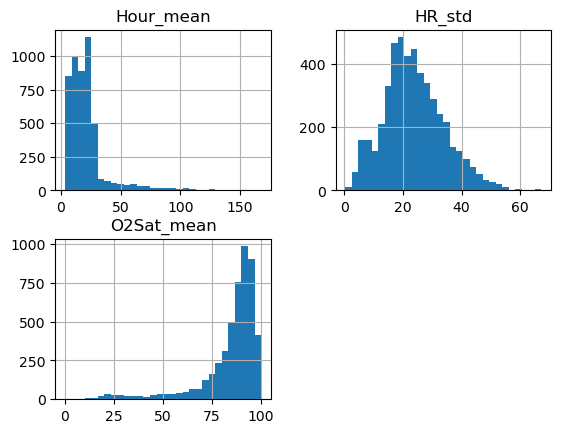

In [9]:
X_train[TARGET_NUMERIC_FEATURES].hist(bins=30)
plt.show()

In [10]:
from feature_engine.discretisation import EqualWidthDiscretiser

In [11]:
# Set up the discretization transformer
disc = EqualWidthDiscretiser(bins=10, variables=TARGET_NUMERIC_FEATURES)


# Fit the transformer
disc.fit(X_train)
disc.fit(X_val)
disc.fit(X_test)

# Transform the data
#With the fit() method, the discretizer learns the bin boundaries and saves 
#them into a dictionary so we can use them to transform unseen data:

train_ewd = disc.transform(X_train)
val_ewd = disc.transform(X_val)
test_ewd = disc.transform(X_test)

In [12]:
# Learned limits for each variable
disc.binner_dict_

{'Hour_mean': [-inf,
  19.9,
  36.3,
  52.699999999999996,
  69.1,
  85.5,
  101.89999999999999,
  118.29999999999998,
  134.7,
  151.1,
  inf],
 'HR_std': [-inf,
  8.6782880224892,
  16.807512671372677,
  24.936737320256153,
  33.06596196913963,
  41.19518661802311,
  49.32441126690658,
  57.45363591579006,
  65.58286056467354,
  73.71208521355702,
  inf],
 'O2Sat_mean': [-inf,
  10.0,
  20.0,
  30.0,
  40.0,
  50.0,
  60.0,
  70.0,
  80.0,
  90.0,
  inf]}

In [13]:
X_train[TARGET_NUMERIC_FEATURES].head()

,Hour_mean,HR_std,O2Sat_mean
19414,17.5,26.800187,84.972222
15961,34.0,19.727929,95.057971
24655,14.0,23.829534,90.982759
32997,29.0,9.533225,97.186441
7680,23.0,13.149500,96.893617


In [14]:
print(train_ewd[TARGET_NUMERIC_FEATURES].head())

       Hour_mean  HR_std  O2Sat_mean
19414          0       3           8
15961          1       2           9
24655          0       2           9
32997          1       1           9
7680           1       1           9


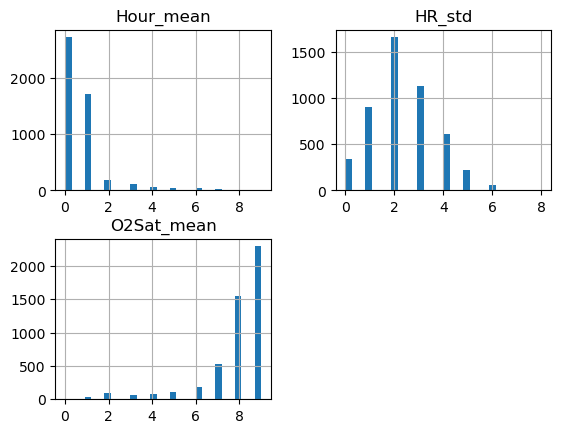

In [15]:
train_ewd[TARGET_NUMERIC_FEATURES].hist(bins=30)
plt.show()

In [16]:
from feature_engine.discretisation import EqualFrequencyDiscretiser

In [17]:
# List the target numeric variables for equal-frequency discretization
#TARGET_NUMERIC_FEATURES= ['Hour_mean', 'HR_mean', 'HR_min', 'HR_max', 'HR_std', 'O2Sat_mean', 'O2Sat_min', 'O2Sat_max']

# Set up the discretization transformer
disc = EqualFrequencyDiscretiser(
    q=10,
    variables=TARGET_NUMERIC_FEATURES)


# Fit the transformer
disc.fit(X_train)
disc.fit(X_val)
disc.fit(X_test)# List the target numeric variables for equal-frequency discretization
#TARGET_NUMERIC_FEATURES= ['Hour_mean', 'HR_mean', 'HR_min', 'HR_max', 'HR_std', 'O2Sat_mean', 'O2Sat_min', 'O2Sat_max']

# Set up the discretization transformer
disc = EqualFrequencyDiscretiser(
    q=10,
    variables=TARGET_NUMERIC_FEATURES)


# Fit the transformer
disc.fit(X_train)
disc.fit(X_val)
disc.fit(X_test)

EqualFrequencyDiscretiser(variables=['Hour_mean', 'HR_std', 'O2Sat_mean'])

In [18]:
from feature_engine.discretisation import EqualWidthDiscretiser

In [19]:
# List the target numeric variables for equal-frequency discretization
#TARGET_NUMERIC_FEATURES= ['Hour_mean', 'HR_mean', 'HR_min', 'HR_max', 'HR_std', 'O2Sat_mean', 'O2Sat_min', 'O2Sat_max']

# Set up the discretization transformer
disc = EqualFrequencyDiscretiser(
    q=10,
    variables=TARGET_NUMERIC_FEATURES)


# Fit the transformer
disc.fit(X_train)
disc.fit(X_val)
disc.fit(X_test)

EqualFrequencyDiscretiser(variables=['Hour_mean', 'HR_std', 'O2Sat_mean'])

In [20]:

# Learned limits for each variable
disc.binner_dict_

{'Hour_mean': [-inf,
  6.5,
  9.5,
  11.5,
  15.5,
  18.5,
  21.0,
  23.0,
  26.0,
  34.600000000000136,
  inf],
 'HR_std': [-inf,
  11.458678931342961,
  15.485105113880206,
  17.94210989823771,
  20.370838416705755,
  22.875752676055654,
  25.332709322193992,
  28.182391750624802,
  31.47961389309913,
  36.86894927041351,
  inf],
 'O2Sat_mean': [-inf,
  63.85333333333333,
  78.78611111111111,
  84.21477732793522,
  87.375,
  89.63095238095238,
  91.37688679245284,
  92.91563636363637,
  94.46280193236716,
  96.33333333333331,
  inf]}

In [21]:
X_train[TARGET_NUMERIC_FEATURES].head()

,Hour_mean,HR_std,O2Sat_mean
19414,17.5,26.800187,84.972222
15961,34.0,19.727929,95.057971
24655,14.0,23.829534,90.982759
32997,29.0,9.533225,97.186441
7680,23.0,13.149500,96.893617


In [22]:
# Transform the data
train_ef = disc.transform(X_train)
val_ef = disc.transform(X_val)
test_ef = disc.transform(X_test)

In [23]:
print(train_ef[TARGET_NUMERIC_FEATURES].head())

       Hour_mean  HR_std  O2Sat_mean
19414          4       6           3
15961          8       3           8
24655          3       5           5
32997          8       0           9
7680           6       1           9


In [24]:
# Find accuracy for Frequency-wise method
# Random Forest classifier on the training data
rfc = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rfc.fit(train_ef, y_train)

# Make predictions on the validation set
y_pred_val = rfc.predict(val_ef)

# Evaluate the model performance on the validation set
RF_acc_val = accuracy_score(y_val, y_pred_val)
print('Validation Accuracy:', RF_acc_val)
print(classification_report(y_val, y_pred_val))

# Make predictions on the testing set
y_pred_test = rfc.predict(test_ef)

# Evaluate the model performance on the testing set
RF_acc_test = accuracy_score(y_test, y_pred_test)
print('Testing Accuracy:', RF_acc_test)
print(classification_report(y_test, y_pred_test))

Validation Accuracy: 0.8579545454545454
              precision    recall  f1-score   support

           0       0.84      0.96      0.90       782
           1       0.91      0.68      0.78       450

    accuracy                           0.86      1232
   macro avg       0.87      0.82      0.84      1232
weighted avg       0.86      0.86      0.85      1232

Testing Accuracy: 0.8639636225843123
              precision    recall  f1-score   support

           0       0.85      0.96      0.90      1759
           1       0.90      0.66      0.76       880

    accuracy                           0.86      2639
   macro avg       0.88      0.81      0.83      2639
weighted avg       0.87      0.86      0.86      2639

